In [55]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import glob

In [3]:
# csv_202203_202309の中にあるcsvを一つのcsvにする
for i in range(len(glob.glob("./csv_202203_202309/*.csv"))):
    if i == 0:
        df = pd.read_csv(glob.glob("./csv_202203_202309/*.csv")[i])
    else:
        df = pd.concat([df, pd.read_csv(glob.glob("./csv_202203_202309/*.csv")[i])])


In [5]:
# start_station_idとend_station_idの欠損値は削除する
df = df.dropna(subset=["start_station_id", "end_station_id"])

In [6]:
# dfをcsvにする
df.to_csv("./csv_202203_202309/chicago_bike_202203_202309.csv", index=False)

In [56]:
all = pd.read_csv("./csv_202203_202309/202203-divvy-tripdata.csv")
all.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member


In [57]:
all['start_lat_lng'] = list(zip(all.start_lat, all.start_lng))
all['end_lat_lng'] = list(zip(all.end_lat, all.end_lng))

In [58]:
all.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member,"(41.886875, -87.62603)","(41.88917683258, -87.6385057718)"
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member,"(41.90099766666667, -87.62375166666666)","(41.898203, -87.637536)"
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member,"(41.978353, -87.659753)","(41.9840446107, -87.6602738295)"
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member,"(41.886875, -87.62603)","(41.8777079559, -87.6353211408)"
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member,"(41.911722, -87.626804)","(41.877945, -87.662007)"


In [59]:
# all['start_lat_lng'] = all['start_lat_lng'].apply(lambda x: tuple(map(float, x[1:-1].split(', '))))
# all['end_lat_lng'] = all['end_lat_lng'].apply(lambda x: tuple(map(float, x[1:-1].split(', '))))
all['start_lat_lng'] = all['start_lat_lng'].apply(lambda x: tuple(map(lambda y: round(y, 5), x)))
all['end_lat_lng'] = all['end_lat_lng'].apply(lambda x: tuple(map(lambda y: round(y, 5), x)))

In [60]:
all.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_lng,end_lat_lng
0,47EC0A7F82E65D52,classic_bike,2022-03-21 13:45:01,2022-03-21 13:51:18,Wabash Ave & Wacker Pl,TA1307000131,Kingsbury St & Kinzie St,KA1503000043,41.886875,-87.626030,41.889177,-87.638506,member,"(41.88688, -87.62603)","(41.88918, -87.63851)"
1,8494861979B0F477,electric_bike,2022-03-16 09:37:16,2022-03-16 09:43:34,Michigan Ave & Oak St,13042,Orleans St & Chestnut St (NEXT Apts),620,41.900998,-87.623752,41.898203,-87.637536,member,"(41.901, -87.62375)","(41.8982, -87.63754)"
2,EFE527AF80B66109,classic_bike,2022-03-23 19:52:02,2022-03-23 19:54:48,Broadway & Berwyn Ave,13109,Broadway & Ridge Ave,15578,41.978353,-87.659753,41.984045,-87.660274,member,"(41.97835, -87.65975)","(41.98404, -87.66027)"
3,9F446FD9DEE3F389,classic_bike,2022-03-01 19:12:26,2022-03-01 19:22:14,Wabash Ave & Wacker Pl,TA1307000131,Franklin St & Jackson Blvd,TA1305000025,41.886875,-87.626030,41.877708,-87.635321,member,"(41.88688, -87.62603)","(41.87771, -87.63532)"
4,431128AD9AFFEDC0,classic_bike,2022-03-21 18:37:01,2022-03-21 19:19:11,DuSable Lake Shore Dr & North Blvd,LF-005,Loomis St & Jackson Blvd,13206,41.911722,-87.626804,41.877945,-87.662007,member,"(41.91172, -87.6268)","(41.87794, -87.66201)"


In [61]:
# Get the node_list, edge_list and timestamp
def return_nm(df):
    df = df.dropna()
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    # started_atで昇順にソート
    df = df.sort_values(by='started_at')
    current_timestamp = df['started_at'].min()
    end_timestamp = df["started_at"].max()
    interval = timedelta(days=1)

    node_list = []
    edge_list = []
    timestamp = []

    while current_timestamp <= end_timestamp:
        timestamp.append(current_timestamp)
        next_timestamp = current_timestamp + interval
        df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

        # node_list
        node_list.extend(list(df_tmp['start_lat_lng'].unique()))
        node_list.extend(list(df_tmp['end_lat_lng'].unique()))
        node_list = list(set(node_list))

        # edge_list
        edge_list.extend(list(df_tmp.values))
        # edge_list = list(set(edge_list))
        
        
        current_timestamp = next_timestamp

    return node_list, edge_list, timestamp

In [80]:
# Convert the date column to datetime format
all['started_at'] = pd.to_datetime(all['started_at'])

# Set the date column as the index
all.set_index(all['started_at'], inplace=True)

# Resample the data by day
daily_data = all.resample('D')

# Apply analysis to each daily segment
node_list = []
edge_list = []
timestamp = []

for segment in daily_data:
    # Your analysis code here
    # segmentのユニークなstart_lat_lngとend_lat_lngを足した数をnode_listに入れる
    # start_station_idとend_station_idでエッジリストを作成
    node_list.extend(list(segment[1]['start_lat_lng'].unique()))
    node_list.extend(list(segment[1]['end_lat_lng'].unique()))
    node_list = list(set(node_list))

    
    # segmentの行の数をedge_listに入れる
    edge_list.append(segment[1].shape[0])

    # segmentのstarted_atの日付をtimestampに入れる
    timestamp.append(segment[0].strftime('%Y-%m-%d'))

print("-----------------")
print("node list")
print(len(node_list))
print("-----------------")
print("edge list")
print(len(edge_list))
print("-----------------")
print("timestamp")
print(timestamp)


-----------------
node list
72184
-----------------
edge list
31
-----------------
timestamp
['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07', '2022-03-08', '2022-03-09', '2022-03-10', '2022-03-11', '2022-03-12', '2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16', '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20', '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24', '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31']


In [75]:
print("-----------------")
print("node list")
print(node_list)
print("-----------------")

-----------------
node list
[(41.93087, -87.77848), (41.87723, -87.6399), (41.9756, -87.67944), (41.87651, -87.62037), (41.89415, -87.62917), (41.78039, -87.59137), (41.87181, -87.64654), (41.90321, -87.6679), (41.7994, -87.60099), (41.91207, -87.635), (41.96103, -87.64961), (41.79352, -87.61585), (41.89902, -87.63032), (42.01211, -87.68284), (41.85373, -87.69583), (41.85806, -87.65102), (41.87754, -87.6355), (41.89064, -87.61857), (41.90344, -87.66782), (41.9249, -87.71458), (41.96717, -87.67907), (41.8653, -87.61798), (41.95209, -87.69808), (41.94555, -87.64634), (41.8854, -87.62445), (42.00456, -87.66142), (41.88925, -87.63844), (41.87754, -87.63953), (41.88844, -87.64413), (41.87126, -87.67378), (41.88605, -87.63096), (41.85499, -87.6756), (41.87501, -87.67324), (41.88804, -87.77426), (41.8969, -87.63578), (41.9013, -87.67765), (41.89889, -87.62996), (41.88096, -87.61677), (41.88235, -87.63218), (41.8739, -87.62764), (41.94655, -87.68341), (41.79328, -87.58779), (41.88994, -87.6341

ValueError: x and y must be the same size

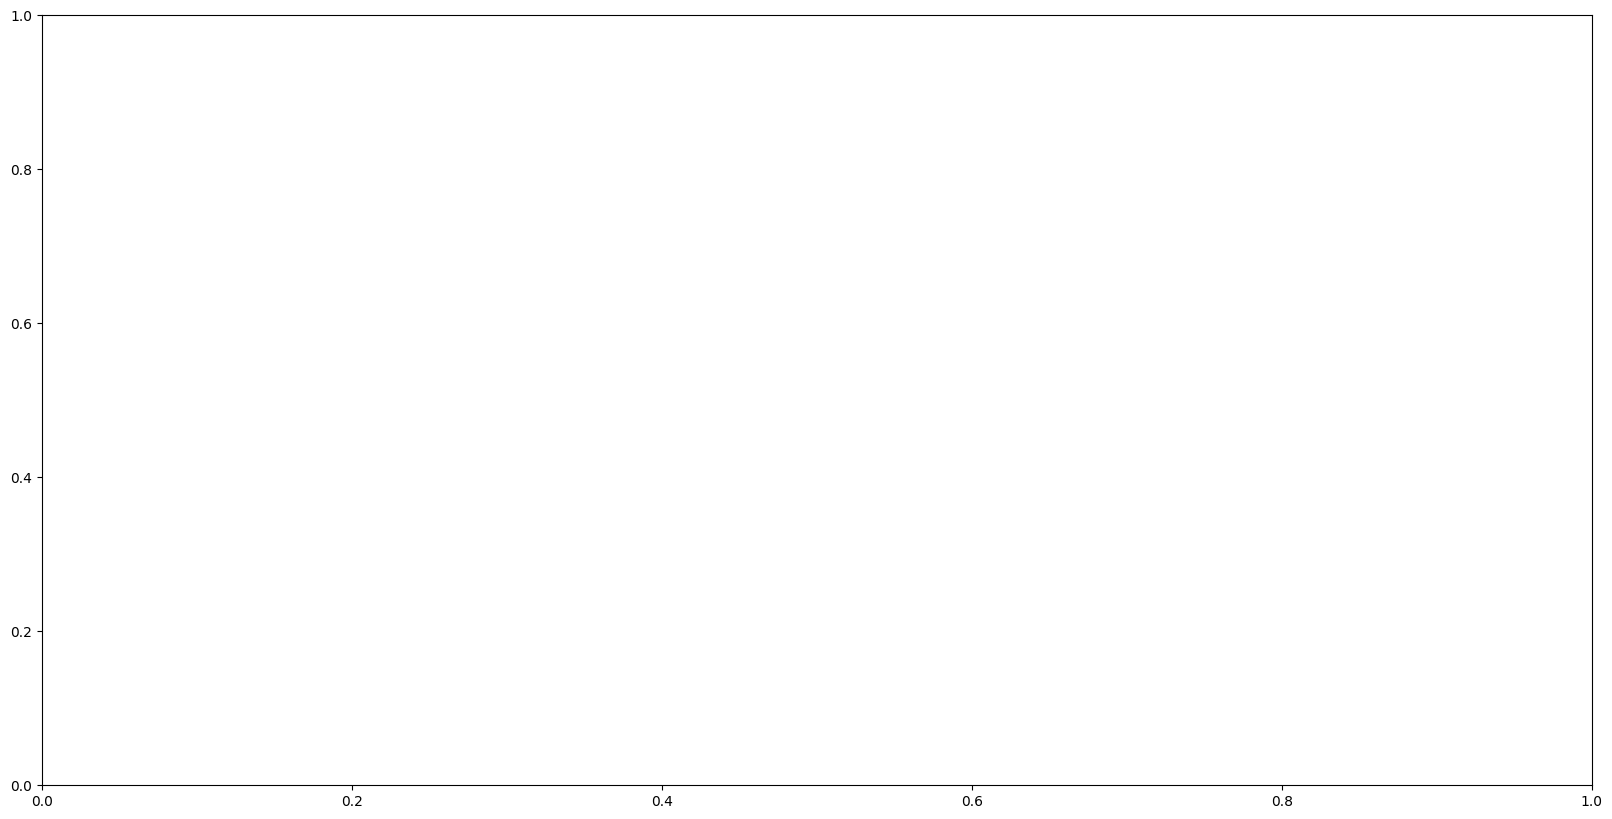

In [81]:
# plot
plt.figure(figsize=(20, 10))
plt.scatter(node_list, edge_list, label="202203")
plt.xlabel("node")
plt.ylabel("edge")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

In [49]:
# allから1000件サンプリングする
df_202203 = pd.read_csv("./csv_202203_202309/start_lat_lng_id_202203.csv")
df_202203.head()

,start_lat_lng,start_lat_lng_id
0,"(41.88688, -87.62603)",0
1,"(41.901, -87.62375)",1
2,"(41.97835, -87.65975)",2
3,"(41.91172, -87.6268)",3
4,"(41.91802, -87.65218)",4


In [46]:
# Get the node_list, edge_list and timestamp
def return_nm(df):
    df['started_at'] = pd.to_datetime(df['started_at'])
    df['ended_at'] = pd.to_datetime(df['ended_at'])
    # started_atで昇順にソート
    df = df.sort_values(by='started_at')
    current_timestamp = df['started_at'].min()
    end_timestamp = df["started_at"].max()
    interval = timedelta(days=1)

    node_list = []
    edge_list = []
    timestamp = []

    while current_timestamp <= end_timestamp:
        timestamp.append(current_timestamp)
        next_timestamp = current_timestamp + interval
        df_tmp = df[(df['started_at'] >= current_timestamp) & (df['started_at'] < next_timestamp)]

        # node_listにユニークなstart_lat_lngの数を追加
        df_tmp = df_tmp[["started_at", "ended_at", 'start_lat_lng', 'end_lat_lng']]


        # node_listにユニークなstart_lat_lngの数を追加
        

        # edge_listにdf_tmpの行数を追加
        edge_list.append(len(df_tmp))
        # df_tmpの重複を削除
        edge_list = list(set(edge_list))

    return node_list, edge_list, timestamp

In [47]:
sample_nmt = return_nm(sample)
sample_nmt

KeyboardInterrupt: 

In [21]:
print("node_list: ", all["start_lat_lng"].nunique())

node_list:  72502


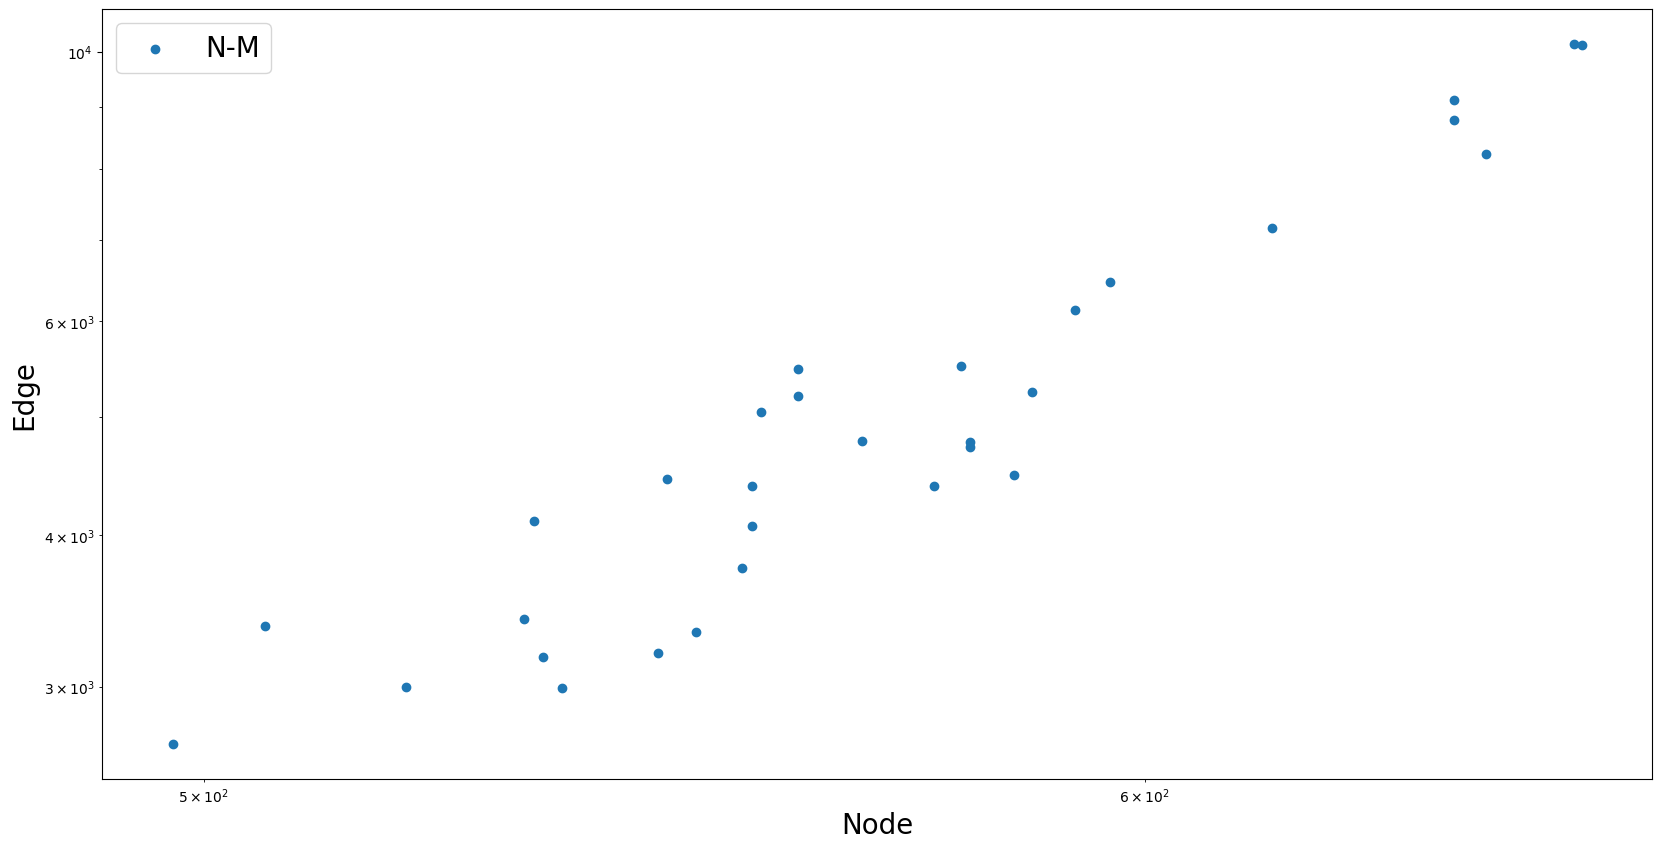

In [12]:
# node_listとedge_listをプロットする
plt.figure(figsize=(20, 10))
plt.scatter(all_node_list, all_edge_list, label='N-M')
plt.xlabel('Node', fontsize=20)
plt.ylabel('Edge', fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=20)
plt.show()